# Humatics Assessment

importing all the libraries intended for use here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show

## Importing the data

In [3]:
data = pd.read_csv("data.csv")

## Plotting the velocity as a function of time

A static plot with a reliable library like matplotlib

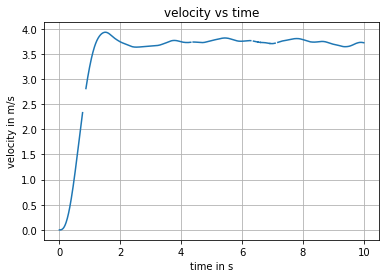

In [4]:
plt.plot(data["time [s]"],data["velocity [m/s]"])
plt.xlabel("time in s")
plt.ylabel("velocity in m/s")
plt.title("velocity vs time")
plt.grid()
plt.show()

An interactive plot with a library like bokeh

In [5]:
bokeh_vel = figure(title="velocity vs time",x_axis_label="time in s",y_axis_label="velocity in m/s")
bokeh_vel.line(data["time [s]"],data["velocity [m/s]"],legend_label="velocity",line_width=2)
# the below command will open an interactive plot in a new tab
show(bokeh_vel)

## Compute acceleration from the velocity

In [6]:
data_acc = data.copy()
data_acc["next_velocity"] = data_acc["velocity [m/s]"].shift(periods=1, fill_value=0)
data_acc["next_time"] = data_acc["time [s]"].shift(periods=1, fill_value=0)
data_acc["acceleration [m/s^2]"] = (data_acc["next_velocity"]-data_acc["velocity [m/s]"])/(data_acc["next_time"] - data_acc["time [s]"])
data_acc = data_acc[1:]

## Plotting acceleration as a function of time

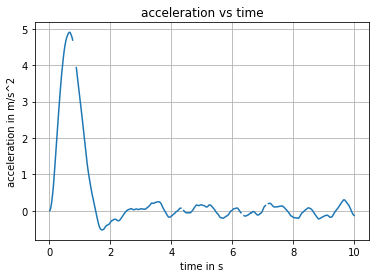

In [7]:
plt.plot(data_acc["time [s]"],data_acc["acceleration [m/s^2]"])
plt.xlabel("time in s")
plt.ylabel("acceleration in m/s^2")
plt.title("acceleration vs time")
plt.grid()
plt.show()

In [8]:
bokeh_acc = figure(title="acceleration vs time",x_axis_label="time in s",y_axis_label="acceleration in m/s^2")
bokeh_acc.line(data_acc["time [s]"],data_acc["acceleration [m/s^2]"],legend_label="acceleration",line_width=2)
# the below command will open an interactive plot in a new tab
show(bokeh_acc)

From the above velocity vs time plots it can be seen that a simple linear interpolation of the data to fill the missing values would suffice (i.e. drawing straight lines from one missing end to the other would be enough)

In [9]:
data_vel = data.copy()
data_vel["velocity [m/s]"] = data_vel["velocity [m/s]"].interpolate(method="linear")

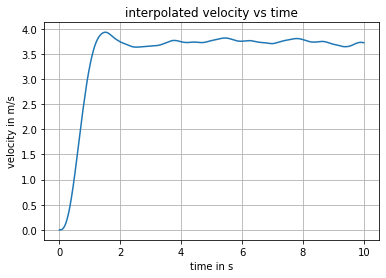

In [10]:
plt.plot(data_vel["time [s]"],data_vel["velocity [m/s]"])
plt.xlabel("time in s")
plt.ylabel("velocity in m/s")
plt.title("interpolated velocity vs time")
plt.grid()
plt.show()

In [11]:
bokeh_vel = figure(title="interpolated velocity vs time",x_axis_label="time in s",y_axis_label="velocity in m/s")
bokeh_vel.line(data_vel["time [s]"],data_vel["velocity [m/s]"],legend_label="velocity",line_width=2)
# the below command will open an interactive plot in a new tab
show(bokeh_vel)

In [36]:
import streamlit as st
x = st.slider("Show velocity till",0,len(data_vel))
st.line_chart(data_vel[:x])